## Basic idea: practice buidling Convlutional neural networks to recognize brain lesions such as broca's aphesia...


`torchvision` - used as a base domain library for Pytorch computer vision

`torchvision.datasets` - has datasets along with data loading functions for computer vision

`torchvision.models` - gets pretrained computer vision models which one can levegerage to address problems they have encountered

`torchvision.transforms` - contains functions for manipulating vision data (images) in order to prep for use with an ML model

`torch.utils.data.Dataset` - Base dataset class for PyTorch

`torch.utils.data.DataLoader` - Creates a Python iterable over a dataset


In [1]:
# Import Python
import torch
from torch import nn

# Imports for torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Checking vesions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [2]:
# Getting training data, first practicing with FashionMNIST dataset
# then will go towards mri dataset

from torchvision import datasets
from torchvision.transforms import ToTensor # Turns images to tensors

training_data = datasets.FashionMNIST(
    root="data", # Location where downloaded data is placed
    train=True,  # If false, will download test dataset
    download=True,
    transform=ToTensor(), # Converts each image to tensor form
    target_transform=None
)

testing_data = datasets.FashionMNIST(
    root="data",
    train=False, # downlaods testing dataset
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 13.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.66MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.4MB/s]


In [3]:
# Check len of my train and test datasets
len(training_data), len(testing_data)

(60000, 10000)

In [4]:
# Take a look at the first image now that it has been turned into a tensor
image, label = training_data[0]
image.shape, image, label

# image.shape explanation => 1 - color channal, 28 x 28  - image dimensions

(torch.Size([1, 28, 28]),
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863

In [5]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = training_data.class_to_idx # very useful tool
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

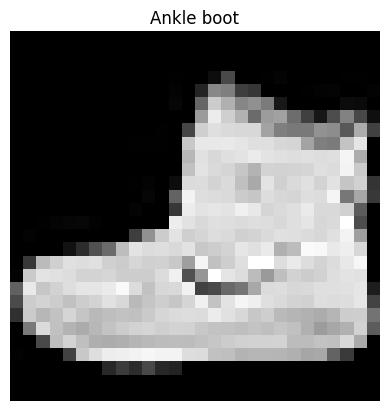

In [8]:
import matplotlib.pyplot as plt

image, label = training_data[0]
# image

# Remove the channel dimension
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()


In [9]:
training_data.targets[0].item()

9

In [10]:
for key, value in (class_to_idx).items():
  if value == training_data.targets[0].item():
    print(key)

Ankle boot


torch.Size([28, 28])


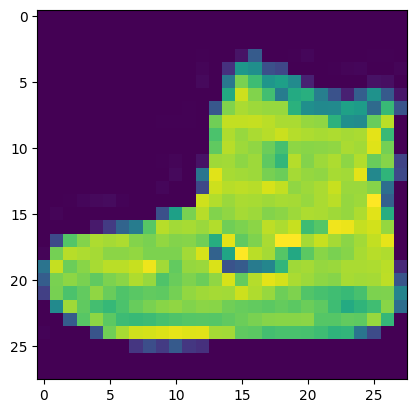

In [11]:
print(image.squeeze().size())
plt.imshow(image.squeeze())

In [12]:
training_data, testing_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
# Preparing DataLoader

from torch.utils.data import DataLoader

BATCH_SIZE = 32
training_dataloader = DataLoader(training_data,
                                 batch_size=BATCH_SIZE,
                                 shuffle=True) # prevents model from memorizing order and helps train

testing_dataloader = DataLoader(testing_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False)


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(training_dataloader))
train_features_batch.shape, train_labels_batch.shape # each batch contains 32 images of shape [1, 28, 28] +32 labels

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [15]:
# Getting helper functions
import requests
from pathlib import Path

# Download helper functions form Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [16]:
# Import accuray metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
#loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(params=model_0.parameters(),
#                            lr=0.1)

In [17]:
# Building a Convolutional Neural network

In [18]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time.

  Args:
    start (float): Start time of computation (preferred in timeit format).
    end (float): End time of computation.
    device ([type], optional): Device that compute is running

  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time
# Set up device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


# Set the seed and start the time
torch.manual_seed(42)
train_time_start_on_cpu = timer()


In [19]:
def train_step(model: torch.nn.Module,
                 dataloader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 optimizer: torch.optim.Optimizer,
                 accuracy_fn,
                device: torch.device = device):

  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).
  """
  train_loss, train_acc = 0, 0
  model.train()

  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(training_dataloader):
    # Put data on the target device
    X, y = X.to(device), y.to(device)
    model.train()

    # 1. Forward pass (outputs the raw loggits from the model)
    y_pred = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


  # Divide total train loss by length of train dataloader
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
  return train_loss, train_acc

In [20]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """
  Performs a testing loop step on model going through all of the required testing steps
  """
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader: # Changed t to y in loop
      # Send the data to the target device
      X, y = X.to(device), y.to(device) # Now y is defined

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> predictions
      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [21]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TonyVGG
  model from CNN exxplainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
    # Create a conv layer
    nn.Conv2d(in_channels=input_shape,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
    # Create a conv layer
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      #print(x.shape)
      x = self.conv_block_2(x)
      #print(x.shape)
      x = self.classifier(x)
      return x

In [22]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [23]:
rand_image_tensor = torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [24]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [25]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image shape: {test_image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image shape: torch.Size([3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.

In [26]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [27]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=3,
                         stride=2,
                         padding=0)
# Pass the data through the convolutional later
conv_output = conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 31, 31])

In [28]:
test_image.shape

torch.Size([3, 64, 64])

In [29]:
# Setup loss function/eval metrics/optimzier

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             dataloader=training_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=testing_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59407 | Train acc: 78.31%
Test loss: 0.00176 | Test acc: 0.26%
Test loss: 0.00169 | Test acc: 0.25%
Test loss: 0.00094 | Test acc: 0.28%
Test loss: 0.00066 | Test acc: 0.30%
Test loss: 0.00116 | Test acc: 0.29%
Test loss: 0.00051 | Test acc: 0.31%
Test loss: 0.00061 | Test acc: 0.31%
Test loss: 0.00143 | Test acc: 0.26%
Test loss: 0.00079 | Test acc: 0.28%
Test loss: 0.00088 | Test acc: 0.29%
Test loss: 0.00106 | Test acc: 0.29%
Test loss: 0.00131 | Test acc: 0.26%
Test loss: 0.00128 | Test acc: 0.29%
Test loss: 0.00089 | Test acc: 0.29%
Test loss: 0.00157 | Test acc: 0.27%
Test loss: 0.00120 | Test acc: 0.28%
Test loss: 0.00076 | Test acc: 0.29%
Test loss: 0.00145 | Test acc: 0.26%
Test loss: 0.00104 | Test acc: 0.28%
Test loss: 0.00193 | Test acc: 0.26%
Test loss: 0.00128 | Test acc: 0.29%
Test loss: 0.00153 | Test acc: 0.24%
Test loss: 0.00161 | Test acc: 0.27%
Test loss: 0.00139 | Test acc: 0.27%
Test loss: 0.00122 | Test acc: 0.28%
Test loss: 0.001

In [33]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device): # Added device argument
  """Returns a dictionary containing the results of model predicting on a data_loader"""

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      # Moved model to device
      model = model.to(device) # Move model to the appropriate device before the forward pass
      y_pred = model(X) # Changed model_0 to model

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=testing_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33901700377464294,
 'model_acc': 87.77955271565496}

In [34]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  """
  Makes predictions on data using model.
  """
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = sample.unsqueeze(dim=0).to(device)

      # Make a prediction with the model and append to list
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [36]:
img, label = testing_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [38]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(testing_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'True label: Sandal')

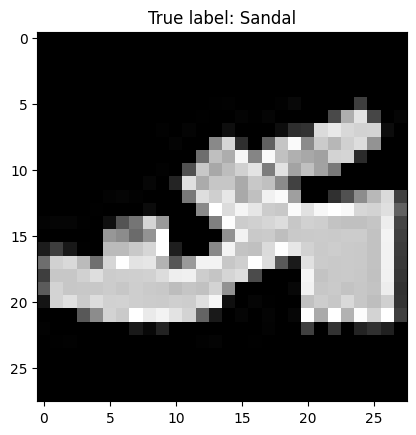

In [39]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(f"True label: {class_names[test_labels[0]]}")

In [40]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs

# View first two prediction probabilities
pred_probs[:2]

tensor([[2.5247e-07, 4.5058e-07, 2.4578e-07, 3.0297e-07, 9.4654e-07, 9.9958e-01,
         6.4377e-07, 3.0532e-05, 1.0621e-04, 2.8307e-04],
        [3.0243e-02, 7.4059e-01, 1.0902e-03, 1.9038e-01, 1.4848e-02, 2.8795e-04,
         2.1992e-02, 4.0350e-04, 1.0850e-04, 5.6972e-05]])

In [41]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [43]:
# Convert prediction probailities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [44]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

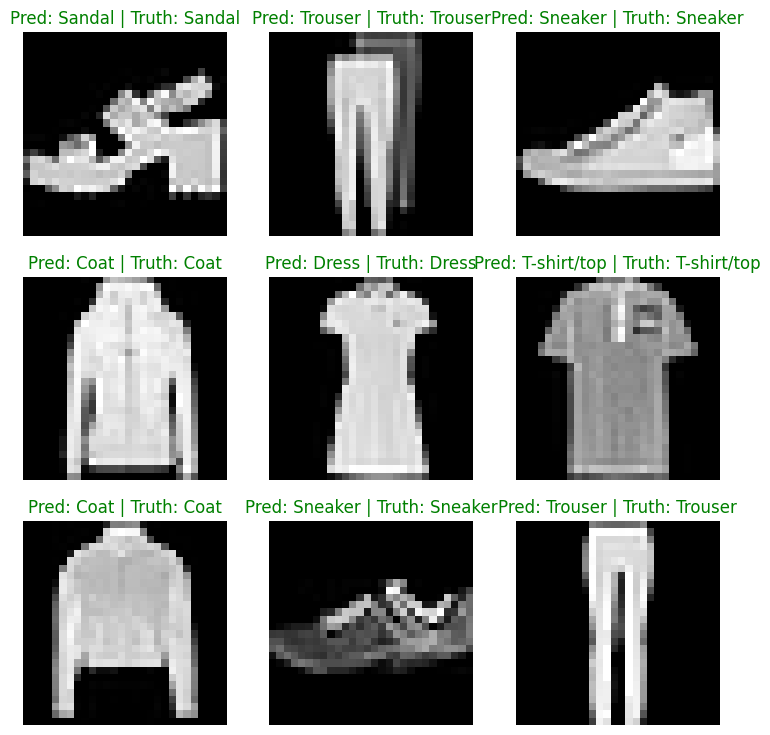

In [45]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  plt.title(f"Pred: {pred_label} | Truth: {truth_label}")

  # Check for equality between pred and Truth and change color of title text
  if pred_label == truth_label:
    color = "green"
  else:
    color = "red"
  plt.title(f"Pred: {pred_label} | Truth: {truth_label}", color=color)
  plt.axis(False)


# Translating work to brain lesion classification

In [47]:
# 1. Install kaggle
!pip install -q kaggle

# 2. Insert your Kaggle username and API key directly
import os

# 🔥 Replace these two with your actual Kaggle username and key
os.environ['KAGGLE_USERNAME'] = "[INSERT USERNAME]"
os.environ['KAGGLE_KEY'] = "[INSERT KAGGLE KEY]"

# 3. Download and unzip the dataset
!mkdir -p ~/.kaggle
!echo '{"username":"'"$KAGGLE_USERNAME"'","key":"'"$KAGGLE_KEY"'"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Now use the Kaggle API
!kaggle datasets download -d esfiam/brain-tumor-mri-dataset --unzip -p data/

print("✅ Dataset downloaded and extracted!")

Dataset URL: https://www.kaggle.com/datasets/esfiam/brain-tumor-mri-dataset
License(s): MIT
✅ Dataset downloaded and extracted!


In [48]:
from torch import optim
from torchvision import transforms

data_dir = "data"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

brain_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64,64)),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5))
])

train_dataset = datasets.ImageFolder(train_dir, transform=brain_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=brain_transform)

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Classes: ", train_dataset.classes)
num_classes = len(train_dataset.classes)
print("Number of classes: ", num_classes)

Classes:  ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of classes:  4


In [49]:
class BrainTumorCNN(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64 * 16 * 16, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes),
    )

  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [53]:
model = BrainTumorCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()          # multi-class
optimizer = optim.Adam(model.parameters(), lr=0.01) # 1e-3


In [55]:
num_epochs = 5
for epoch in range(1, num_epochs+1):
    # — Training —
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataset)

    # — Validation —
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total   += labels.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch}/{num_epochs} — train loss: {epoch_loss:.4f} — val acc: {val_acc:.4f}")


Epoch 1/5 — train loss: 0.6125 — val acc: 0.7979
Epoch 2/5 — train loss: 0.5429 — val acc: 0.8224
Epoch 3/5 — train loss: 0.4770 — val acc: 0.8294
Epoch 4/5 — train loss: 0.4563 — val acc: 0.8448
Epoch 5/5 — train loss: 0.4126 — val acc: 0.8678


In [56]:
torch.save(model.state_dict(), "brain_tumor_cnn.pth")
print("Model saved ➞ brain_tumor_cnn.pth")

Model saved ➞ brain_tumor_cnn.pth


In [57]:
# load model weights fresh (just to prove it works)
model.load_state_dict(torch.load("brain_tumor_cnn.pth", map_location=device))
model.eval()

BrainTumorCNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)

In [58]:
# grab one sample from the validation set
sample_img, sample_label = test_dataset[0]
with torch.no_grad():
    logits = model(sample_img.unsqueeze(0).to(device))
    pred   = logits.argmax(dim=1).item()

True label: glioma
Pred label: glioma


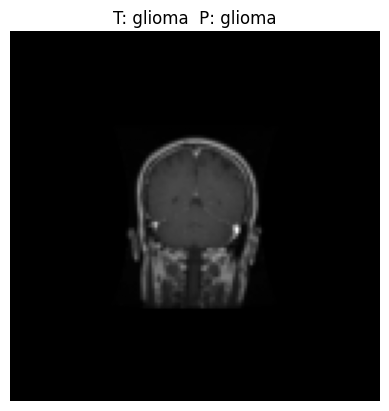

In [59]:
print(f"True label: {test_dataset.classes[sample_label]}")
print(f"Pred label: {test_dataset.classes[pred]}")

# (Optional) show the image
plt.imshow(sample_img.squeeze(), cmap="gray")
plt.title(f"T: {test_dataset.classes[sample_label]}  P: {test_dataset.classes[pred]}")
plt.axis("off")
plt.show()

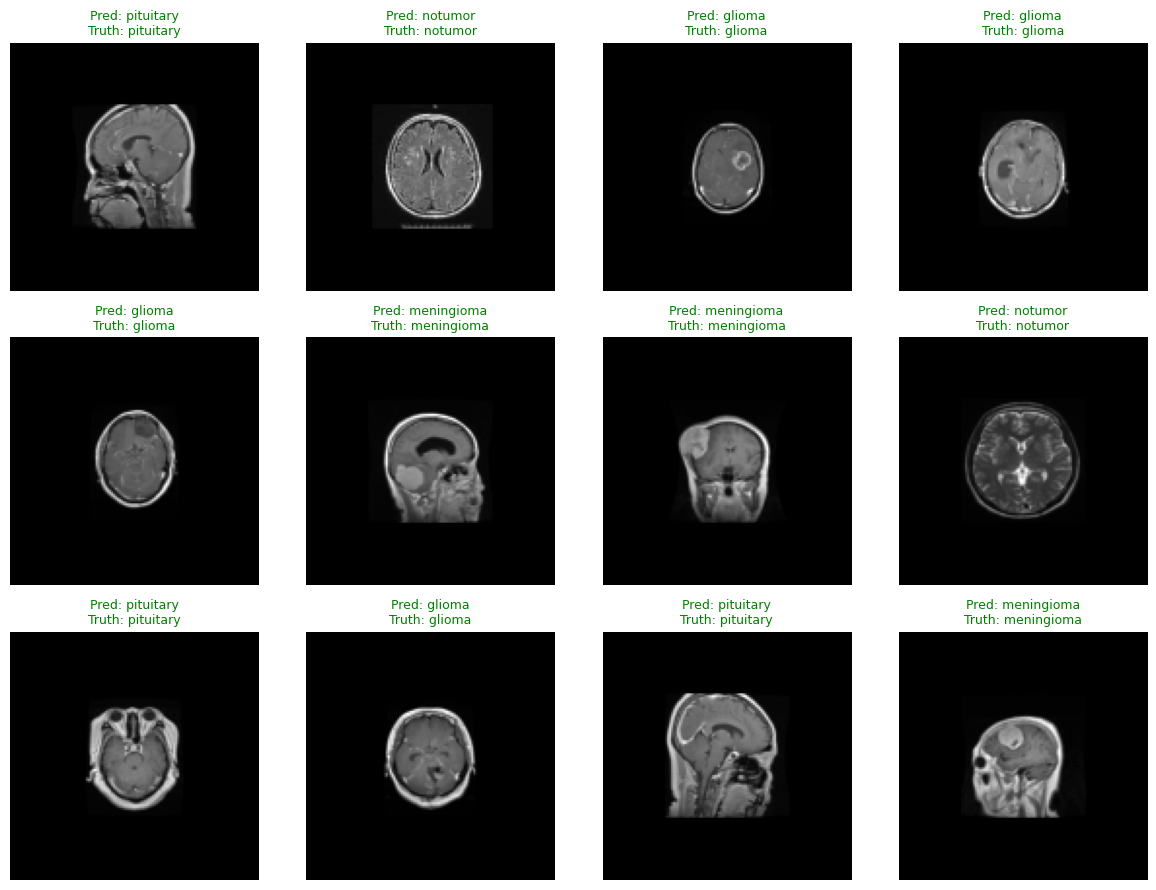

In [61]:
import random
import matplotlib.pyplot as plt

# 1. Pick N random validation samples
nrows, ncols = 3, 4
n_images = nrows * ncols
indices = random.sample(range(len(test_dataset)), n_images)

# 2. Store the images, labels, predictions
test_samples = []
test_labels = []
pred_classes = []

model.eval()
with torch.no_grad():
    for idx in indices:
        img, label = test_dataset[idx]
        test_samples.append(img)
        test_labels.append(label)

        pred_logits = model(img.unsqueeze(0).to(device))  # add batch dim
        pred_class = pred_logits.argmax(dim=1).item()
        pred_classes.append(pred_class)

# 3. Plot predictions in a grid
plt.figure(figsize=(ncols * 3, nrows * 3))
for i in range(n_images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(test_samples[i].squeeze(), cmap="gray")

    pred_label = train_dataset.classes[pred_classes[i]]
    truth_label = train_dataset.classes[test_labels[i]]

    color = "green" if pred_label == truth_label else "red"
    plt.title(f"Pred: {pred_label}\nTruth: {truth_label}", color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()
